In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from tqdm.notebook import tqdm

In [20]:
models = ['sup_vit', 'dino', 'dinov2', 'mae', 'simmim']
layers = range(1,13)
classes = ['road','vegetation','building','car','sky','person','bicycle','traffic sign','terrain','sidewalk','pole','fence','bus','truck','traffic light','rider','wall','train','motorcycle','Average']
model_title = {
    'dino': "DINO",
    'dinov2': "DINOv2",
    'sup_vit': "Supervised ViT",
    'mae': "MAE",
    'simmim': "SimMIM",
}

In [21]:
results = np.zeros((len(models), len(layers), len(classes)))
results_linear = np.zeros((len(models), len(layers), len(classes)))

In [22]:
data = {
    'dinov2': """0.089	0.384	0.406	0.481	0.538	0.656	0.639	0.711	0.757	0.808	0.824	0.858
0.086	0.360	0.538	0.520	0.645	0.700	0.659	0.668	0.683	0.709	0.707	0.726
0.167	0.311	0.344	0.299	0.392	0.485	0.454	0.533	0.613	0.681	0.734	0.772
0.044	0.050	0.095	0.090	0.172	0.306	0.318	0.450	0.604	0.715	0.775	0.837
0.067	0.372	0.310	0.355	0.352	0.428	0.389	0.456	0.458	0.526	0.565	0.662
0.007	0.011	0.020	0.014	0.062	0.103	0.108	0.179	0.296	0.406	0.481	0.552
0.003	0.004	0.010	0.007	0.048	0.116	0.098	0.155	0.282	0.440	0.527	0.588
0.001	0.008	0.019	0.008	0.044	0.098	0.080	0.118	0.194	0.293	0.352	0.427
0.001	0.012	0.034	0.020	0.052	0.077	0.082	0.108	0.134	0.235	0.260	0.350
0.017	0.071	0.102	0.092	0.102	0.135	0.114	0.159	0.211	0.258	0.310	0.364
0.018	0.022	0.018	0.017	0.031	0.062	0.072	0.098	0.143	0.181	0.223	0.252
0.003	0.011	0.010	0.007	0.008	0.026	0.021	0.030	0.054	0.081	0.126	0.188
0.004	0.002	0.007	0.001	0.009	0.010	0.010	0.019	0.059	0.147	0.356	0.729
0.004	0.006	0.010	0.020	0.027	0.018	0.019	0.043	0.067	0.105	0.246	0.513
0.000	0.000	0.008	0.006	0.011	0.023	0.015	0.030	0.068	0.120	0.230	0.254
0.002	0.000	0.005	0.010	0.018	0.020	0.016	0.045	0.085	0.088	0.136	0.366
0.000	0.006	0.010	0.006	0.006	0.021	0.019	0.024	0.051	0.064	0.123	0.163
0.000	0.000	0.003	0.000	0.000	0.002	0.003	0.002	0.012	0.026	0.161	0.418
0.000	0.000	0.000	0.009	0.005	0.033	0.022	0.025	0.043	0.048	0.163	0.410
0.027	0.086	0.103	0.103	0.133	0.175	0.165	0.203	0.253	0.312	0.384	0.496""",
    'dino': """0.556	0.609	0.676	0.743	0.798	0.823	0.841	0.846	0.844	0.838	0.834	0.833
0.412	0.559	0.640	0.709	0.748	0.773	0.792	0.801	0.803	0.800	0.797	0.799
0.359	0.438	0.503	0.584	0.645	0.695	0.729	0.753	0.754	0.751	0.745	0.743
0.112	0.185	0.250	0.375	0.479	0.566	0.648	0.710	0.727	0.720	0.709	0.703
0.509	0.499	0.491	0.565	0.634	0.681	0.724	0.753	0.755	0.750	0.750	0.760
0.029	0.043	0.079	0.143	0.209	0.294	0.373	0.429	0.438	0.441	0.437	0.430
0.023	0.031	0.054	0.113	0.190	0.288	0.377	0.451	0.484	0.464	0.452	0.433
0.071	0.102	0.137	0.201	0.244	0.293	0.315	0.341	0.345	0.343	0.324	0.321
0.079	0.080	0.100	0.154	0.216	0.242	0.277	0.284	0.271	0.253	0.246	0.257
0.079	0.114	0.148	0.214	0.264	0.296	0.317	0.320	0.308	0.304	0.305	0.311
0.035	0.056	0.086	0.121	0.153	0.181	0.201	0.214	0.217	0.219	0.222	0.215
0.027	0.025	0.037	0.053	0.074	0.087	0.118	0.148	0.141	0.137	0.130	0.116
0.006	0.008	0.017	0.023	0.035	0.076	0.121	0.159	0.166	0.158	0.143	0.141
0.015	0.014	0.026	0.033	0.032	0.034	0.042	0.050	0.058	0.064	0.066	0.068
0.008	0.025	0.035	0.048	0.053	0.082	0.098	0.109	0.099	0.104	0.102	0.101
0.004	0.015	0.030	0.039	0.051	0.083	0.107	0.118	0.129	0.125	0.127	0.115
0.006	0.013	0.017	0.027	0.056	0.092	0.105	0.136	0.130	0.135	0.125	0.125
0.000	0.000	0.000	0.005	0.008	0.015	0.013	0.020	0.024	0.025	0.021	0.023
0.000	0.000	0.000	0.004	0.033	0.041	0.053	0.058	0.070	0.076	0.073	0.067
0.123	0.148	0.175	0.219	0.259	0.297	0.329	0.353	0.356	0.353	0.348	0.345""",
    'mae': """0.0192	0.0133	0.0093	0.0161	0.0161	0.0239	0.0261	0.0319	0.0319	0.0319	0.0394	0.0394
0.0294	0.0886	0.0514	0.1544	0.1544	0.2094	0.4210	0.4348	0.4348	0.4348	0.4912	0.4912
0.1691	0.1488	0.1238	0.1572	0.1572	0.1379	0.1631	0.2136	0.2136	0.2136	0.1590	0.1590
0.1131	0.0836	0.0646	0.0730	0.0730	0.0707	0.0829	0.0859	0.0859	0.0859	0.0937	0.0937
0.1559	0.1430	0.1338	0.1551	0.1551	0.1446	0.1687	0.1754	0.1754	0.1754	0.0980	0.0980
0.0088	0.0067	0.0049	0.0082	0.0082	0.0093	0.0133	0.0072	0.0072	0.0072	0.0498	0.0498
0.0000	0.0000	0.0000	0.0005	0.0005	0.0000	0.0006	0.0000	0.0000	0.0000	0.0005	0.0005
0.0085	0.0174	0.0070	0.0060	0.0060	0.0076	0.0069	0.0078	0.0078	0.0078	0.0136	0.0136
0.0410	0.0427	0.0367	0.0376	0.0376	0.0348	0.0364	0.0373	0.0373	0.0373	0.0465	0.0465
0.0016	0.0016	0.0011	0.0025	0.0025	0.0021	0.0045	0.0101	0.0101	0.0101	0.0132	0.0132
0.0102	0.0084	0.0210	0.0160	0.0160	0.0228	0.0334	0.0135	0.0135	0.0135	0.0465	0.0465
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0037	0.0050	0.0050	0.0050	0.0126	0.0126
0.0044	0.0035	0.0021	0.0029	0.0029	0.0038	0.0034	0.0073	0.0073	0.0073	0.0057	0.0057
0.0242	0.0155	0.0026	0.0024	0.0024	0.0006	0.0036	0.0035	0.0035	0.0035	0.0112	0.0112
0.0008	0.0002	0.0066	0.0075	0.0075	0.0071	0.0000	0.0000	0.0000	0.0000	0.0021	0.0021
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0032	0.0032
0.0018	0.0050	0.0035	0.0049	0.0049	0.0094	0.0067	0.0120	0.0120	0.0120	0.0171	0.0171
0.0010	0.0005	0.0002	0.0002	0.0002	0.0002	0.0002	0.0000	0.0000	0.0000	0.0006	0.0006
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000
0.0310	0.0305	0.0247	0.0339	0.0339	0.0360	0.0513	0.0550	0.0550	0.0550	0.0581	0.0581""",
    'sup_vit': """0.5040	0.5789	0.6094	0.6887	0.7415	0.7651	0.8106	0.8208	0.8233	0.8178	0.7974	0.7852
0.4289	0.5068	0.5618	0.6684	0.7113	0.7346	0.7609	0.7703	0.7713	0.7639	0.7478	0.7299
0.3492	0.4058	0.4457	0.5298	0.5959	0.6386	0.7049	0.7282	0.7369	0.7344	0.7134	0.6929
0.1166	0.1503	0.1861	0.2810	0.4007	0.5029	0.6327	0.6813	0.7008	0.6967	0.6669	0.6391
0.5356	0.5161	0.4520	0.5052	0.5792	0.6213	0.6767	0.6922	0.6929	0.6897	0.6497	0.6268
0.0231	0.0375	0.0510	0.0954	0.1452	0.2230	0.3564	0.3781	0.4173	0.4215	0.3980	0.4005
0.0173	0.0212	0.0347	0.0616	0.1041	0.1728	0.3111	0.3854	0.4024	0.3972	0.3791	0.3500
0.0614	0.0793	0.1119	0.1580	0.2053	0.2572	0.2959	0.3073	0.3210	0.3324	0.3259	0.3127
0.1313	0.0766	0.0807	0.1197	0.1787	0.2320	0.2679	0.2839	0.3065	0.3063	0.2752	0.2694
0.0856	0.0981	0.1146	0.1585	0.2048	0.2222	0.2784	0.2834	0.2727	0.2658	0.2439	0.2347
0.0353	0.0454	0.0557	0.0897	0.1227	0.1556	0.1843	0.2021	0.2098	0.2069	0.1933	0.1976
0.0252	0.0219	0.0283	0.0317	0.0387	0.0529	0.1094	0.1676	0.1486	0.1464	0.1344	0.1272
0.0023	0.0050	0.0063	0.0105	0.0192	0.0461	0.1109	0.1388	0.1469	0.1418	0.1410	0.1084
0.0072	0.0103	0.0168	0.0190	0.0247	0.0254	0.0453	0.0506	0.0763	0.1035	0.1227	0.0817
0.0059	0.0096	0.0282	0.0363	0.0435	0.0509	0.0855	0.0969	0.1141	0.0972	0.0945	0.0789
0.0044	0.0054	0.0165	0.0325	0.0492	0.0532	0.0848	0.0827	0.0836	0.0966	0.0649	0.0731
0.0003	0.0048	0.0051	0.0169	0.0326	0.0548	0.1122	0.1081	0.0997	0.0804	0.0668	0.0676
0.0019	0.0047	0.0047	0.0023	0.0026	0.0018	0.0086	0.0060	0.0435	0.0804	0.0765	0.0586
0.0000	0.0000	0.0000	0.0062	0.0166	0.0286	0.0198	0.0579	0.0607	0.1074	0.0941	0.0550
0.1229	0.1357	0.1479	0.1848	0.2219	0.2547	0.3082	0.3285	0.3383	0.3414	0.3255	0.3100""",
    'simmim': """0.0931	0.3302	0.4108	0.6487	0.5616	0.5837	0.5781	0.5666	0.4961	0.3930	0.3776	0.5245
0.4040	0.2459	0.3960	0.3739	0.4758	0.5091	0.4489	0.4428	0.4136	0.1985	0.1451	0.3955
0.1668	0.2658	0.3458	0.4075	0.4112	0.4012	0.3710	0.3317	0.2991	0.2233	0.2406	0.1448
0.0795	0.0531	0.1399	0.1559	0.1037	0.1115	0.1519	0.1595	0.1117	0.0368	0.0122	0.0157
0.3618	0.2480	0.2953	0.3002	0.3305	0.3432	0.3716	0.3904	0.4050	0.3995	0.3065	0.2466
0.0187	0.0066	0.0068	0.0192	0.0412	0.0283	0.0483	0.0419	0.0352	0.0166	0.0075	0.0012
0.0068	0.0006	0.0018	0.0060	0.0015	0.0023	0.0027	0.0033	0.0015	0.0000	0.0000	0.0000
0.0240	0.0416	0.0349	0.0383	0.0402	0.0550	0.0858	0.0911	0.0843	0.0185	0.0015	0.0040
0.0212	0.0371	0.0668	0.0390	0.0562	0.0453	0.0508	0.0527	0.0302	0.0372	0.0394	0.0192
0.0130	0.0491	0.0531	0.0656	0.0891	0.1054	0.1083	0.0924	0.0763	0.0537	0.0392	0.0187
0.0340	0.0250	0.0331	0.0364	0.0407	0.0474	0.0481	0.0550	0.0526	0.0265	0.0088	0.0148
0.0092	0.0032	0.0034	0.0047	0.0059	0.0058	0.0162	0.0119	0.0192	0.0027	0.0003	0.0000
0.0025	0.0050	0.0048	0.0072	0.0107	0.0083	0.0119	0.0118	0.0137	0.0042	0.0014	0.0036
0.0160	0.0059	0.0045	0.0039	0.0019	0.0011	0.0012	0.0064	0.0022	0.0028	0.0000	0.0180
0.0018	0.0126	0.0062	0.0129	0.0198	0.0186	0.0190	0.0338	0.0279	0.0195	0.0032	0.0163
0.0000	0.0000	0.0006	0.0193	0.0120	0.0036	0.0098	0.0104	0.0063	0.0000	0.0000	0.0000
0.0007	0.0000	0.0058	0.0123	0.0247	0.0132	0.0148	0.0095	0.0028	0.0011	0.0000	0.0016
0.0006	0.0003	0.0003	0.0012	0.0003	0.0007	0.0003	0.0004	0.0008	0.0000	0.0000	0.0000
0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000	0.0000
0.0660	0.0700	0.0952	0.1133	0.1172	0.1202	0.1231	0.1217	0.1094	0.0755	0.0623	0.0750"""
}

linears = """0.765	0.867	0.913	0.843	0.739
0.748	0.829	0.811	0.815	0.614
0.724	0.803	0.835	0.792	0.549
0.691	0.753	0.875	0.763	0.275
0.618	0.814	0.795	0.753	0.660
0.476	0.478	0.633	0.521	0.000
0.388	0.458	0.648	0.343	0.000
0.299	0.325	0.410	0.275	0.000
0.273	0.355	0.520	0.348	0.045
0.329	0.426	0.515	0.314	0.059
0.253	0.278	0.322	0.268	0.025
0.137	0.170	0.297	0.173	0.000
0.034	0.126	0.817	0.228	0.004
0.103	0.060	0.596	0.117	0.000
0.206	0.179	0.367	0.180	0.000
0.006	0.086	0.457	0.096	0.000
0.165	0.201	0.248	0.076	0.000
0.130	0.015	0.614	0.224	0.000
0.000	0.047	0.532	0.000	0.000
0.334	0.383	0.590	0.375	0.156"""

In [23]:
for mi, model in enumerate(models):
    parsed = np.array([[float(x) for x in row.split('\t')] for row in data[model].split('\n')])
    results[mi] = parsed.T

In [24]:
results.shape

(5, 12, 20)

In [25]:
parsed = np.array([[float(x) for x in row.split('\t')] for row in linears.split('\n')])

In [26]:
parsed.shape

(20, 5)

In [27]:
results_linear[:,-1, :] = parsed.T

In [10]:
!mkdir jupyter_notebooks/images/layerwise-knn

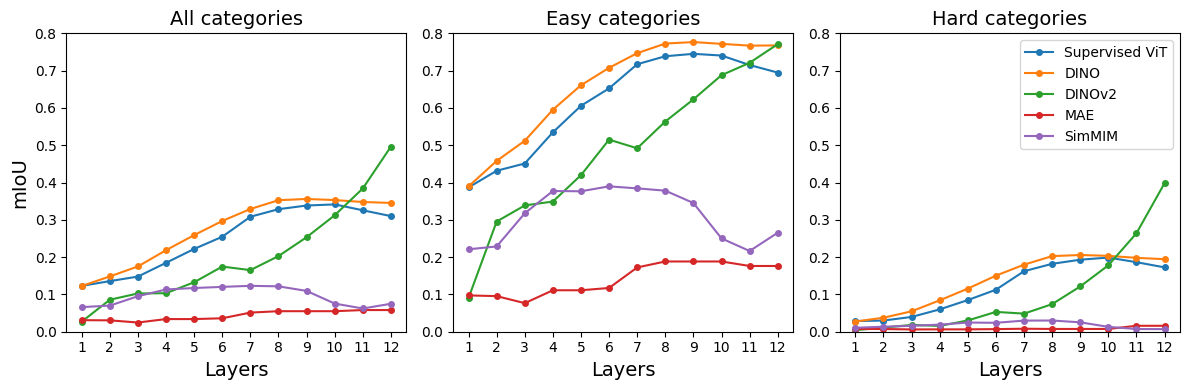

In [32]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))
fs = 14
ms = 4
for mi, model in enumerate(models):
    ax[0].plot(results[mi, :, :-1].mean(-1), label=model_title[model], marker='o', markersize=ms)
    ax[1].plot(results[mi, :, :5].mean(-1), label=model_title[model], marker='o', markersize=ms)
    ax[2].plot(results[mi, :, 5:-1].mean(-1), label=model_title[model], marker='o', markersize=ms)

ax[2].legend();
ax[0].set_title('All categories', fontsize=fs)
ax[1].set_title('Easy categories', fontsize=fs)
ax[2].set_title('Hard categories', fontsize=fs)
ax[0].set_ylabel("mIoU", fontsize=fs);
    
for i in range(3):
    ax[i].set_ylim(0, 0.8)
    ax[i].set_xticks(range(12));
    ax[i].set_xticklabels(layers);
    ax[i].set_xlabel("Layers", fontsize=fs);
    
plt.tight_layout()
plt.savefig('jupyter_notebooks/images/layerwise-knn/cityscapes-layerwise.pdf')

In [12]:
classes[:5]

['road', 'vegetation', 'building', 'car', 'sky']

In [13]:
mae_degraded_knn = np.array([0.058096, 0.169994, 0.198159, 0.218504, 0.227643, 0.253179,
        0.277036, 0.294701, 0.288511, 0.263043, 0.026548])
mae_degraded_linear = np.array([0.375182, 0.373585, 0.373925, 0.371039, 0.376631, 0.369163,
        0.369858, 0.364433, 0.328893, 0.243497, 0.060181])

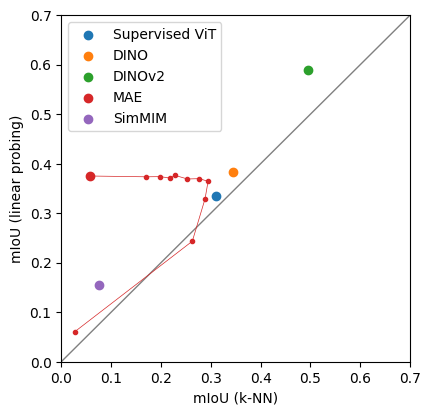

In [14]:
plt.figure(figsize=(4.5, 4.5))
plt.plot([0, 1], [0, 1], color='grey', linewidth=1)

for mi, model in enumerate(models):
#     plt.scatter(results[mi,-1,:5].mean(-1), results_linear[mi,-1,:5].mean(-1),  c=f'C{mi}', marker='+', s=50, label='Easy categories' if mi == 0 else None)
#     plt.scatter(results[mi,-1,5:-1].mean(-1), results_linear[mi,-1,5:-1].mean(-1), c=f'C{mi}', marker='x', label='Hard categories' if mi == 0 else None)
    plt.scatter(results[mi,-1,-1], results_linear[mi,-1,-1], label=model_title[model], c=f'C{mi}')
#     plt.scatter(results[mi,-1,:], results_linear[mi,-1,:], label=model_title[model])

plt.plot(mae_degraded_knn, mae_degraded_linear, color='C3', marker='o', markersize=3, linewidth=0.5)

# plt.scatter([0.294701], [0.364433], label='MAE(200)', color='darkred')


plt.xlim(0, .7)
plt.ylim(0, .7)
plt.legend()
plt.xlabel("mIoU (k-NN)")
plt.ylabel("mIoU (linear probing)");

In [15]:
kNN_subsets = np.array([
[36                , 0.291 , 0.315 , 0.486  , 0.056 , 0.053],
[72                , 0.310 , 0.335 , 0.494  , 0.058 , 0.075],
[72                , 0.299 , 0.318 , 0.474  , 0.055 , 0.050],
[144               , 0.316 , 0.333 , 0.509  , 0.055 , 0.071], 
])

In [16]:
linear_subsets = np.array([
    [36                , 0.282 , 0.349 , 0.526  , 0.327 , 0.127],
    [72                , 0.334 , 0.383 , 0.590  , 0.375 , 0.156],
    [72                , 0.334 , 0.389 , 0.560  , 0.359 , 0.154],
    [144               , 0.384 , 0.417 , 0.607  , 0.408 , 0.215],
])

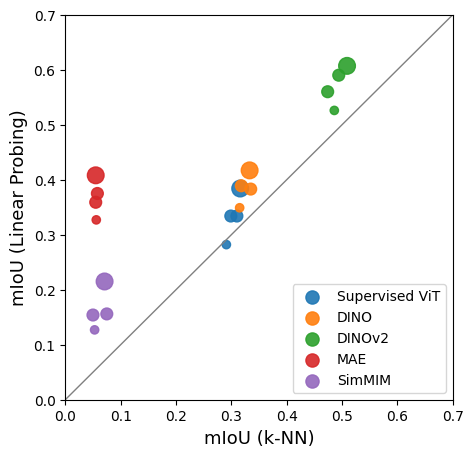

In [34]:
plt.figure(figsize=(5,5))

plt.plot([0, 1], [0, 1], color='grey', linewidth=1)

plt.xlim(0, .7)
plt.ylim(0, .7)
for mi, model in enumerate(models):
    plt.scatter(
        kNN_subsets[:, mi+1],
        linear_subsets[:, mi+1],
        s = kNN_subsets[:, 0],
        label=model_title[model],
        alpha=0.9
    )
    
plt.legend(loc='lower right')
plt.xlabel("mIoU (k-NN)", fontsize=fs-1)
plt.ylabel("mIoU (Linear Probing)", fontsize=fs-1);
plt.savefig('jupyter_notebooks/images/cityscapes-subsets.pdf')